In [1]:
import pandas as pd
from datetime import timedelta

In [2]:
df = pd.read_csv("t1.csv")
df

Unnamed: 0 Building    Level              MacId        Lat  \
0                 0     TPS1  Level 2  48:2c:a0:fc:bc:91 -22.811964   
1                 1     TPS1  Level 2  98:39:8e:02:25:95 -22.811885   
2                 2     TPS1  Level 2  98:39:8e:02:25:95 -22.811572   
3                 3     TPS1  Level 2  98:39:8e:02:25:95 -22.811592   
4                 4     TPS1  Level 2  30:76:6f:ee:00:66 -22.812069   
...             ...      ...      ...                ...        ...   
1638638     1638638     TPS1  Level 3  48:49:c7:c5:60:00 -22.811811   
1638639     1638639     TPS1  Level 3  10:f1:f2:98:a1:dd -22.811769   
1638640     1638640     TPS1  Level 3  2c:59:8a:67:d7:d6 -22.810901   
1638641     1638641     TPS1  Level 3  00:5b:94:4a:42:b3 -22.811562   
1638642     1638642     TPS1  Level 3  00:5b:94:4a:42:b3 -22.811562   

               Lng                              Time  days        Date  \
0       -43.250092  2019-08-01 02:52:53.579000+00:00     5  2019-08-01   
1       -43.249220  2019-08-01 03:19:56.375000+00:00     7  2019-08-01   
2       -43.249384  2019-08-01 03:21:46.394000+00:00     7  2019-08-01   
3       -43.249422  2019-08-01 03:21:56.343000+00:00     7  2019-08-01   
4       -43.250337  2019-08-01 03:23:38.105000+00:00     1  2019-08-01   
...            ...                               ...   ...         ...   
1638638 -43.250769  2019-12-31 23:03:21.462000+00:00     9  2019-12-31   
1638639 -43.250708  2019-12-31 23:08:31.235000+00:00     2  2019-12-31   
1638640 -43.251732  2019-12-31 23:13:17.458000+00:00     7  2019-12-31   
1638641 -43.250691  2019-12-31 23:41:05.800000+00:00     1  2019-12-31   
1638642 -43.250691  2019-12-31 23:41:05.803000+00:00     1  2019-12-31   

          Hours  ...  new_lng Yrday  dow  \
0         4.411  ... -43.2501   213    3   
1         7.827  ... -43.2492   213    3   
2         7.827  ... -43.2494   213    3   
3         7.827  ... -43.2494   213    3   
4         2.943  ... -43.2503   213    3   
...         ...  ...      ...   ...  ...   
1638638  19.720  ... -43.2508   365    1   
1638639   5.195  ... -43.2507   365    1   
1638640  11.122  ... -43.2517   365    1   
1638641   1.265  ... -43.2507   365    1   
1638642   1.265  ... -43.2507   365    1   

                                              geometry  Eating  Shopping  \
0        POINT (-22.81196436664193 -43.25009243918203)       0         0   
1        POINT (-22.81188470409961 -43.24922012977493)       0         0   
2        POINT (-22.81157241789262 -43.24938427748193)       0         0   
3         POINT (-22.81159225561574 -43.2494221260644)       0         0   
4        POINT (-22.81206918691527 -43.25033744262031)       0         0   
...                                                ...     ...       ...   
1638638  POINT (-22.81181075064968 -43.25076893127275)       0         0   
1638639  POINT (-22.81176871641466 -43.25070846063734)       0         0   
1638640  POINT (-22.81090104061537 -43.25173216906126)       0         0   
1638641  POINT (-22.81156233081185 -43.25069077282189)       0         0   
1638642  POINT (-22.81156233081185 -43.25069077282189)       0         0   

         Waiting  time_part2hr Fly_Cat  activity  
0              1             3       0       3.0  
1              1             4       0       3.0  
2              1             4       0       3.0  
3              1             4       0       3.0  
4              1             2       0       3.0  
...          ...           ...     ...       ...  
1638638        1            10       1       3.0  
1638639        1             3       0       3.0  
1638640        1             6       0       3.0  
1638641        1             1       0       3.0  
1638642        1             1       0       3.0  

[1638643 rows x 25 columns]

In [3]:
# df = df[df["Waiting"] == 3].drop_duplicates(subset="MacId", keep='first', inplace=False)

In [4]:
df_shopping = df.query("Shopping == 1")

In [5]:
df_eating = df.query("Eating == 1")

In [6]:
df_waiting = df.query("Waiting == 1")

In [7]:
df_shopping = df_shopping.drop_duplicates(subset="MacId", keep='first', inplace=False)
df_eating = df_eating.drop_duplicates(subset="MacId", keep='first', inplace=False)
df_waiting = df_waiting.drop_duplicates(subset="MacId", keep='first', inplace=False)

In [8]:
print("Num of Eating: ", len(df_eating))
print("Num of Shopping: ", len(df_shopping))
print("Num of Waiting: ", len(df_waiting))

Num of Eating:  2496
Num of Shopping:  297
Num of Waiting:  65196


In [9]:
df = pd.concat([df_eating,df_shopping,df_waiting])
df.index = range(len(df))
df = df.drop(columns=['Unnamed: 0'])
df

Building    Level              MacId        Lat        Lng  \
0         TPS1  Level 2  dc:bf:e9:4f:6f:c6 -22.812012 -43.250735   
1         TPS1  Level 2  a8:96:75:a6:f9:32 -22.812042 -43.250748   
2         TPS1  Level 2  d4:63:c6:89:a9:9c -22.811984 -43.250747   
3         TPS1  Level 2  38:9a:f6:a3:7c:1b -22.812025 -43.250703   
4         TPS1  Level 2  fc:64:3a:3e:bb:de -22.812035 -43.250703   
...        ...      ...                ...        ...        ...   
67984     TPS1  Level 3  dc:cf:96:cf:e3:f1 -22.811508 -43.250886   
67985     TPS1  Level 3  dc:56:e7:65:36:37 -22.811203 -43.251333   
67986     TPS1  Level 3  7c:8b:b5:41:e3:6f -22.811265 -43.251414   
67987     TPS1  Level 3  b4:ef:39:83:77:7a -22.811175 -43.251384   
67988     TPS1  Level 3  04:52:f3:d4:6d:74 -22.811427 -43.250997   

                                   Time  days        Date   Hours    H/D  ...  \
0      2019-08-01 06:04:34.373000+00:00     1  2019-08-01   1.840  1.840  ...   
1      2019-08-01 06:40:19.860000+00:00     4  2019-08-01   9.953  2.488  ...   
2      2019-08-01 08:22:30.684000+00:00     1  2019-08-01   2.647  2.647  ...   
3      2019-08-01 09:15:36.418000+00:00     4  2019-08-01  11.646  2.911  ...   
4      2019-08-01 09:56:29.720000+00:00     1  2019-08-01   0.543  0.543  ...   
...                                 ...   ...         ...     ...    ...  ...   
67984  2019-12-31 16:58:32.706000+00:00     1  2019-12-31   1.156  1.156  ...   
67985  2019-12-31 18:04:44.931000+00:00     1  2019-12-31   0.524  0.524  ...   
67986  2019-12-31 19:30:12.640000+00:00     1  2019-12-31   0.553  0.553  ...   
67987  2019-12-31 19:43:42.716000+00:00     1  2019-12-31   1.097  1.097  ...   
67988  2019-12-31 21:24:56.719000+00:00     1  2019-12-31   0.507  0.507  ...   

       new_lng  Yrday dow                                       geometry  \
0     -43.2507    213   3  POINT (-22.81201179351676 -43.25073494173567)   
1     -43.2507    213   3  POINT (-22.81204181993357 -43.25074757335197)   
2     -43.2507    213   3   POINT (-22.8119842653632 -43.25074653773221)   
3     -43.2507    213   3   POINT (-22.8120253454725 -43.25070270810438)   
4     -43.2507    213   3   POINT (-22.81203481482352 -43.2507027334492)   
...        ...    ...  ..                                            ...   
67984 -43.2509    365   1   POINT (-22.81150762148121 -43.2508855476801)   
67985 -43.2513    365   1  POINT (-22.81120318954093 -43.25133291627961)   
67986 -43.2514    365   1  POINT (-22.81126525102557 -43.25141377502231)   
67987 -43.2514    365   1  POINT (-22.81117454464609 -43.25138411330269)   
67988 -43.2510    365   1  POINT (-22.81142691955703 -43.25099717561083)   

       Eating  Shopping  Waiting time_part2hr  Fly_Cat  activity  
0           1         0        0            1        0       1.0  
1           1         0        0            5        0       1.0  
2           1         0        0            2        0       1.0  
3           1         0        0            6        0       1.0  
4           1         0        0            1        0       1.0  
...       ...       ...      ...          ...      ...       ...  
67984       0         0        1            1        0       3.0  
67985       0         0        1            1        0       3.0  
67986       0         0        1            1        0       3.0  
67987       0         0        1            1        0       3.0  
67988       0         0        1            1        0       3.0  

[67989 rows x 24 columns]

In [10]:
df['Level'].replace({"Level 2":0, "Level 3": 1}, inplace = True)
df["activity"] = df["activity"].map(lambda x: int(x-1))
df[["activity"]].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67989 entries, 0 to 67988
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Building      67989 non-null  object 
 1   Level         67989 non-null  int64  
 2   MacId         67989 non-null  object 
 3   Lat           67989 non-null  float64
 4   Lng           67989 non-null  float64
 5   Time          67989 non-null  object 
 6   days          67989 non-null  int64  
 7   Date          67989 non-null  object 
 8   Hours         67989 non-null  float64
 9   H/D           67989 non-null  float64
 10  Class         67989 non-null  object 
 11  DaysIn4M      67989 non-null  int64  
 12  Type          67989 non-null  object 
 13  new_lat       67989 non-null  float64
 14  new_lng       67989 non-null  float64
 15  Yrday         67989 non-null  int64  
 16  dow           67989 non-null  int64  
 17  geometry      67989 non-null  object 
 18  Eating        67989 non-nu

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
import matplotlib.pyplot as plt
from matplotlib import rc
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score
from keras.layers import LSTM
import random
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.utils.random import sample_without_replacement
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
import datetime
import calendar 
from sklearn.metrics import classification_report

/Users/luochen/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/luochen/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/luochen/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/luochen/o

In [12]:
scaler = StandardScaler()

X = scaler.fit_transform(df[['Level','Fly_Cat','time_part2hr','new_lat','new_lng','dow']])
Y = df[['activity']]

In [13]:
corr = df.corr()

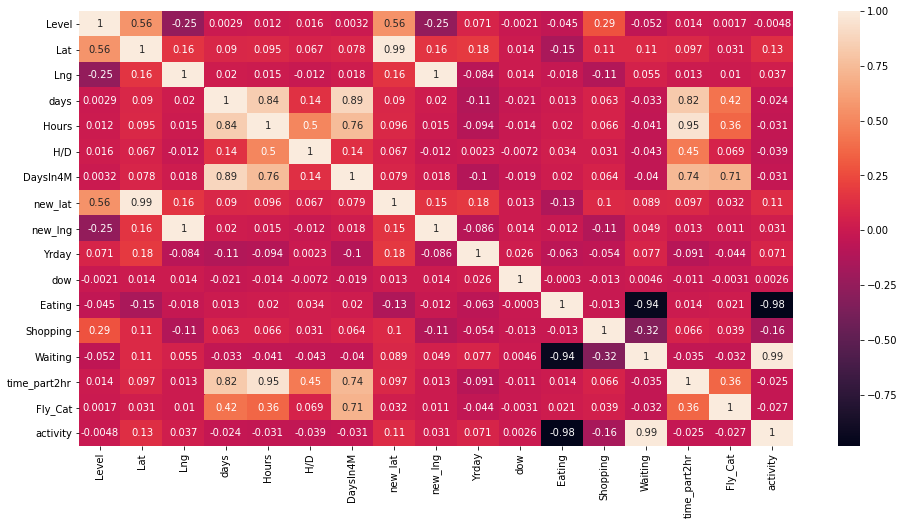

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = ['Restaurant','Shopping','Waiting']

# Split the data into a training set and a test set

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [18]:
## fit model using best_params
eval_set = [(X_test,y_test)]
best_XGB = XGBClassifier(learning_rate=0.25, max_depth=6, n_estimators=460, random_state=42,\
                             subsample = 0.8, colsample_bytree = 0.8)
best_XGB.fit(X_train,y_train)

## predict
y_pred = best_XGB.predict(X_test)
# mean_squared_error(Y_test,y_pred)**(1/2)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


/Users/luochen/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luochen/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 99.07%


In [19]:
target_names = ['Restaurant', 'Shopping', 'Waiting']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Restaurant       0.86      0.92      0.89       495
    Shopping       0.93      0.90      0.91        59
     Waiting       1.00      0.99      1.00     13044

    accuracy                           0.99     13598
   macro avg       0.93      0.94      0.93     13598
weighted avg       0.99      0.99      0.99     13598



Confusion matrix, without normalization
[[  454     0    41]
 [    0    53     6]
 [   75     4 12965]]


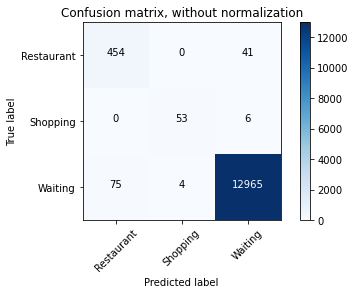

In [20]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [21]:
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred)
print("ROC_AUC is: ", multiclass_roc_auc_score(y_test,y_pred))

ROC_AUC is:  0.9530939182598455


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
x = X.copy()
y = Y.copy()

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(42)
n_samples, n_features = x.shape
x = np.c_[x, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=42))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# # First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# # Finally average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# # Plot all ROC curves
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()